In [1]:
import pandas as pd
import numpy as np
from model import *
import extractor
class Extractor(extractor.AudioDataExtractionPipeline):
    pass

In [2]:
import pandas as pd
df = pd.read_csv("dataset/Data/features_30_sec.csv")
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [3]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['label'])  # Features: e.g., 'track' and 'statistics'
y = df['label']  # Target: 'label'

# Split the dataset while preserving class proportions
X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, 
    test_size=0.3,  # 30% for testing
    stratify=y,     # Preserve class proportions
    random_state=42 # For reproducibility
)

In [4]:
# Drop corrupted sample 
idx = X_train.index[X_train["filename"] == "jazz.00054.wav"]
X_train = X_train.drop(index=idx)
y_train = y_train.drop(index=idx)

In [5]:
model, acc = train_and_evaluate_catboost(
    X_eval.index.to_numpy(), 
    X_train.drop(columns=["filename", "length"]).to_numpy(), 
    X_eval.drop(columns=["filename", "length"]).to_numpy(), 
    y_train.to_numpy(), 
    y_eval.to_numpy()
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3648069	test: 0.3433333	best: 0.3433333 (0)	total: 62ms	remaining: 30.9s
50:	learn: 0.7367668	test: 0.6566667	best: 0.6700000 (47)	total: 200ms	remaining: 1.76s
100:	learn: 0.8211731	test: 0.7200000	best: 0.7233333 (98)	total: 330ms	remaining: 1.3s
150:	learn: 0.8726753	test: 0.7300000	best: 0.7400000 (122)	total: 447ms	remaining: 1.03s
200:	learn: 0.9070100	test: 0.7366667	best: 0.7466667 (182)	total: 564ms	remaining: 838ms
250:	learn: 0.9313305	test: 0.7366667	best: 0.7533333 (218)	total: 682ms	remaining: 676ms
300:	learn: 0.9484979	test: 0.7533333	best: 0.7533333 (218)	total: 797ms	remaining: 527ms
350:	learn: 0.9670959	test: 0.7466667	best: 0.7600000 (318)	total: 913ms	remaining: 388ms
400:	learn: 0.9728183	test: 0.7466667	best: 0.7600000 (318)	total: 1.04s	remaining: 258ms
450:	learn: 0.9756795	test: 0.7400000	best: 0.7600000 (318)	total: 1.16s	remaining: 126ms
499:	learn: 0.9842632	test: 0.7466667	best: 0.7600000 (318)	total: 1.31s	remaining: 0us

bestTest = 0.76
best

In [6]:
import soundfile as sf
import librosa
import numpy as np
from resampy import resample

In [7]:
E_train = Extractor(
    idx=[np.array([row[0]]) for row in X_train.iterrows()],
    x=[row[1].to_numpy() for row in X_train.iterrows()],
    y=[np.array([row]) for row in y_train],
    train=True
)
E_eval = Extractor(
    idx=[np.array([row[0]]) for row in X_eval.iterrows()],
    x=[row[1].to_numpy() for row in X_eval.iterrows()],
    y=[np.array([row]) for row in y_eval],
    train=False
)

def load_audio(x) -> [np.ndarray]:
    file_path = f"dataset/Data/genres_original/{x[0].split('.')[0]}/{x[0]}"
    y, sr = sf.read(file_path)
    if len(y.shape) == 2:  # Convert stereo to mono
        y = np.mean(y, dim=0)
    y = resample(y, sr, 16000)
    return y
Extractor.register_extractor('audio', load_audio)
E_train.full_extract()
E_eval.full_extract()

audio:   0%|          | 0/699 [00:00<?, ?it/s]

audio:   0%|          | 0/300 [00:00<?, ?it/s]

In [8]:
Extractor.register_extractor('stats', lambda x: x[2:])
Extractor.register_extractor('rms', lambda audio: np.array([np.sqrt(np.mean(audio**2))]))
E_train.soft_extract()
E_eval.soft_extract()

stats:   0%|          | 0/699 [00:00<?, ?it/s]

rms:   0%|          | 0/699 [00:00<?, ?it/s]

stats:   0%|          | 0/300 [00:00<?, ?it/s]

rms:   0%|          | 0/300 [00:00<?, ?it/s]

In [9]:
from librosa.sequence import viterbi

import numpy as np

def viterbi_dp(emission_probs, transition_matrix, p_init=None, eps=1e-15):
    """
    A custom Viterbi implementation that outputs:
      1) The DP table (log-domain) of best-path log-probs to each state/frame
      2) The state backpointer table
      3) A probability distribution over states at each time,
         obtained by exponentiating and normalizing the DP table
      4) The best-path state sequence from backtracking

    Parameters
    ----------
    emission_probs : np.ndarray [shape=(n_states, n_frames)]
        Probability (linear scale) of emitting each state at each frame.
        We will take the log of these values for the DP.
    transition_matrix : np.ndarray [shape=(n_states, n_states)]
        Probability (linear scale) of transitioning from state i to state j.
    p_init : np.ndarray [shape=(n_states,)]
        Initial state distribution (linear probabilities).
        If None, defaults to uniform.
    eps : float
        Small constant to avoid log(0).

    Returns
    -------
    dp : np.ndarray [shape=(n_states, n_frames)]
        dp[s, t] = log-prob of the best path that ends in state s at time t
    backpointer : np.ndarray [shape=(n_states, n_frames)]
        backpointer[s, t] = index of the best predecessor state for s at t
    state_probs : np.ndarray [shape=(n_states, n_frames)]
        Probability distribution over states for each frame
        (obtained via time-wise softmax of dp).
    best_path : np.ndarray [shape=(n_frames,)]
        The single best state for each frame (by Viterbi backtracking).
    """

    n_states, n_frames = emission_probs.shape

    if p_init is None:
        p_init = np.ones(n_states) / n_states

    # Convert input probabilities to log
    log_emit = np.log(emission_probs + eps)
    log_trans = np.log(transition_matrix + eps)
    log_init = np.log(p_init + eps)

    # Create storage
    dp = np.zeros((n_states, n_frames), dtype=np.float64)  # log of best path so far
    backpointer = np.zeros((n_states, n_frames), dtype=np.int32)

    # Initialization: time t=0
    dp[:, 0] = log_init + log_emit[:, 0]
    backpointer[:, 0] = 0  # no predecessor for the first frame

    # Forward pass
    for t in range(1, n_frames):
        for s in range(n_states):
            # Possible log-probs if we end in state s at time t
            candidates = dp[:, t-1] + log_trans[:, s]
            best_prev = np.argmax(candidates)
            dp[s, t] = candidates[best_prev] + log_emit[s, t]
            backpointer[s, t] = best_prev

    # Backtrack to find best path
    best_path = np.zeros(n_frames, dtype=np.int32)
    best_path[-1] = np.argmax(dp[:, -1])
    for t in range(n_frames - 2, -1, -1):
        best_path[t] = backpointer[best_path[t+1], t+1]

    # Convert dp to a per-frame probability distribution by exponentiating
    # and normalizing along the 'state' axis
    state_probs = np.zeros_like(dp, dtype=np.float64)
    for t in range(n_frames):
        # shift by max log-prob to avoid underflow
        row = dp[:, t]
        row_max = np.max(row)
        exp_row = np.exp(row - row_max)
        state_probs[:, t] = exp_row / np.sum(exp_row)

    return dp, backpointer, state_probs, best_path


def estimate_cqt_bin_viterbi(
    y,
    sr=22050,
    hop_length=512,
    n_bins=50,
    fmin=librosa.note_to_hz('C2'),
    silence_threshold=0.01,  # total energy below which we strongly favor silence
    stay_probability=0.9
):
    """
    Estimate the most likely CQT-bin sequence from an audio file, plus a
    special silence state. Use librosa's built-in Viterbi for smoothing.

    Parameters
    ----------
    audio_path : str
        Path to the audio file.
    sr : int
        Sample rate for loading the audio.
    hop_length : int
        Hop length for the CQT.
    n_bins : int
        Number of frequency bins in the CQT.
    fmin : float
        Minimum frequency for the CQT.
    silence_threshold : float
        Frames whose total energy is below this threshold are dominated by the silence state.
    stay_probability : float
        Probability of staying in the same state (bin or silence). The remainder
        is distributed across transitioning to all other states.

    Returns
    -------
    state_sequence : np.ndarray [shape=(n_frames,)]
        The best path of states (CQT bin indices plus one extra index for silence).
        Indices 0..(n_bins-1) correspond to actual bins; index n_bins is silence.
    path_log_probs : np.ndarray [shape=(n_frames,)]
        The log-probability of the best path up to (and including) each frame.
    emission_probs : np.ndarray [shape=(n_bins+1, n_frames)]
        The per-frame emission probability of each bin and the silence state.

    Notes
    -----
    - By default, `librosa.sequence.viterbi` expects probabilities in linear domain
      (non-log). We will manually compute the log-likelihood of the best path after
      we get the final state sequence.
    - The silence state (index = n_bins) has no direct column in the input,
      but we infer its emission probability by checking the total frame energy.
    """

    ################################################################
    # 1. Load audio and compute CQT magnitudes
    ################################################################
    cqt = librosa.cqt(y, sr=sr, hop_length=hop_length, n_bins=n_bins, fmin=fmin)
    cqt_mag = np.abs(cqt)  # shape = (n_bins, n_frames)
    n_frames = cqt_mag.shape[1]

    ################################################################
    # 2. Build emission probability matrix (n_bins + 1 states)
    #    - last row is "silence"
    ################################################################
    n_states = n_bins + 1
    silence_idx = n_bins

    emission_probs = np.zeros((n_states, n_frames), dtype=np.float32)

    for t in range(n_frames):
        frame_energy = np.sum(cqt_mag[:, t])

        if frame_energy < silence_threshold:
            # If total energy is below threshold, strongly favor silence
            # and place a minimal probability on actual bins
            emission_probs[:n_bins, t] = 1e-10  # negligible
            emission_probs[silence_idx, t] = 1.0
        else:
            # Distribute across the bins proportionally, plus a small portion for silence
            emission_probs[:n_bins, t] = cqt_mag[:, t]

            # Example: give silence a small probability if frame is not silent
            # You can tune this constant or use a ratio
            emission_probs[silence_idx, t] = 1e-6

            # Normalize so sum of states = 1
            col_sum = np.sum(emission_probs[:, t])
            if col_sum > 0:
                emission_probs[:, t] /= col_sum
            else:
                # fallback if no energy
                emission_probs[silence_idx, t] = 1.0

    ################################################################
    # 3. Define a transition matrix for n_states = n_bins + 1
    #    We'll have:
    #      - High probability stay_probability to remain in the same state
    #      - The remainder distributed equally among all other states
    ################################################################
    transition_matrix = np.zeros((n_states, n_states), dtype=np.float32)
    # For each of the bin states
    for i in range(n_bins):
        transition_matrix[i, i] = stay_probability
        # The fraction to distribute among other states
        remain = (1.0 - stay_probability)
        # We'll give an equal fraction to the other n_states - 1
        transition_matrix[i, :] += remain / (n_states - 1)
        # But this double-counted staying in the same state; revert it to the intended stay_probability
        transition_matrix[i, i] = stay_probability

    # For the silence state
    transition_matrix[silence_idx, silence_idx] = stay_probability
    remain_sil = (1.0 - stay_probability)
    transition_matrix[silence_idx, :] += remain_sil / (n_states - 1)
    # revert the diagonal to stay_probability
    transition_matrix[silence_idx, silence_idx] = stay_probability

    # Normalize each row (should already be ~1.0, but let's be safe)
    for i in range(n_states):
        row_sum = np.sum(transition_matrix[i, :])
        if row_sum > 0:
            transition_matrix[i, :] /= row_sum

    ################################################################
    # 4. Run Viterbi via librosa
    ################################################################
    # librosa.sequence.viterbi expects:
    #    prob: shape=(n_states, n_steps) - each column is a probability distribution
    #    transition: shape=(n_states, n_states)
    # We can optionally specify p_init for initial distribution, e.g. uniform
    p_init = np.ones(n_states, dtype=np.float32) / n_states
    
    return viterbi_dp(emission_probs, transition_matrix, p_init=p_init)[2]


In [10]:
import librosa
import soundfile as sf
from resampy import resample
from tqdm.notebook import tqdm

def compute_cepstrum(audio, sr, n_fft=2048, hop_length=512):
    """
    Compute the cepstrum of an audio signal.

    Parameters:
    - audio (numpy array): The audio signal.
    - sr (int): Sampling rate of the audio signal.
    - n_fft (int): Number of FFT components. Default is 2048.
    - hop_length (int): Number of samples between successive frames. Default is 512.

    Returns:
    - cepstrum (numpy array): The computed cepstrum.
    """
    # Compute the magnitude spectrogram
    spectrogram = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

    # Convert to log scale
    log_spectrogram = np.log1p(spectrogram)

    # Compute the inverse FFT of the log-spectrogram
    cepstrum = np.fft.ifft(log_spectrogram, axis=0).real

    return cepstrum


def compute_cepstrum_over_cqt(y, sr=22050, hop_length=512, bins_per_octave=12, n_bins=84):
    """
    Compute the cepstrum over the CQT of an audio signal.

    Parameters:
        audio_path (str): Path to the audio file.
        sr (int): Sampling rate for the audio.
        hop_length (int): Hop length for the CQT computation.
        bins_per_octave (int): Number of bins per octave for CQT.
        n_bins (int): Number of total bins for CQT.

    Returns:
        cqt_cepstrum (np.ndarray): Cepstrum computed from the CQT.
    """
    # Compute the CQT of the signal
    cqt = librosa.cqt(y, sr=sr, hop_length=hop_length, bins_per_octave=bins_per_octave, n_bins=n_bins)

    # Compute the magnitude spectrum of the CQT
    magnitude = np.abs(cqt)

    # Compute the log of the magnitude
    log_magnitude = np.log1p(magnitude)  # log1p for numerical stability

    # Compute the cepstrum by applying IFFT to the log-magnitude spectrum
    cqt_cepstrum = np.fft.irfft(log_magnitude, axis=0)

    return cqt_cepstrum

sr = 16000
hop_length = 512
n_mfcc = 13
n_mels = 128
n_bins = 84
bins_per_octave = 12
fmin = librosa.note_to_hz("C1")


def mel(audio):
    # Calculate MelSpectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to decibel scale
    return mel_spectrogram

Extractor.register_extractor('mel', mel)
# Extractor.register_extractor('cepstrum', lambda audio: compute_cepstrum(audio, sr=sr))
# Extractor.register_extractor('chroma_cqt', lambda audio: librosa.feature.chroma_cqt(y=audio, sr=sr))
# Extractor.register_extractor('ccqt', lambda audio: compute_cepstrum_over_cqt(y=audio, sr=sr))
# Extractor.register_extractor('cqr_viterbi', lambda audio: estimate_cqt_bin_viterbi(y=audio, sr=sr))
Extractor.register_extractor('cqt', lambda audio: np.abs(librosa.cqt(audio, sr=sr, hop_length=hop_length, fmin=fmin, bins_per_octave=bins_per_octave, n_bins=n_bins)))
# Extractor.register_extractor('stft', lambda audio: librosa.stft(audio, hop_length=hop_length))
Extractor.register_extractor('mfcc', lambda audio: librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc))


In [11]:
E_train.soft_extract()
E_eval.soft_extract()

mel:   0%|          | 0/699 [00:00<?, ?it/s]

cqt:   0%|          | 0/699 [00:00<?, ?it/s]

mfcc:   0%|          | 0/699 [00:00<?, ?it/s]

mel:   0%|          | 0/300 [00:00<?, ?it/s]

cqt:   0%|          | 0/300 [00:00<?, ?it/s]

mfcc:   0%|          | 0/300 [00:00<?, ?it/s]

In [12]:
import matplotlib.pyplot as plt

In [13]:
hop_length=512
Extractor.register_extractor('bpm_beat', lambda audio: librosa.beat.beat_track(y=audio, sr=sr, hop_length=hop_length))
Extractor.register_extractor('bpm', lambda bpm_beat: bpm_beat[0])
Extractor.register_extractor('beat', lambda bpm_beat: bpm_beat[1])

In [14]:
E_train.soft_extract()
E_eval.soft_extract()

bpm_beat:   0%|          | 0/699 [00:00<?, ?it/s]

bpm:   0%|          | 0/699 [00:00<?, ?it/s]

beat:   0%|          | 0/699 [00:00<?, ?it/s]

bpm_beat:   0%|          | 0/300 [00:00<?, ?it/s]

bpm:   0%|          | 0/300 [00:00<?, ?it/s]

beat:   0%|          | 0/300 [00:00<?, ?it/s]

In [15]:
Extractor.register_extractor('cqt_hpss', lambda cqt: librosa.decompose.hpss(cqt))
Extractor.register_extractor('harmonic', lambda cqt_hpss: cqt_hpss[0])
Extractor.register_extractor('percussive', lambda cqt_hpss: cqt_hpss[1])

In [16]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_hpss:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic:   0%|          | 0/699 [00:00<?, ?it/s]

percussive:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_hpss:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic:   0%|          | 0/300 [00:00<?, ?it/s]

percussive:   0%|          | 0/300 [00:00<?, ?it/s]

(0.0, 30.0)

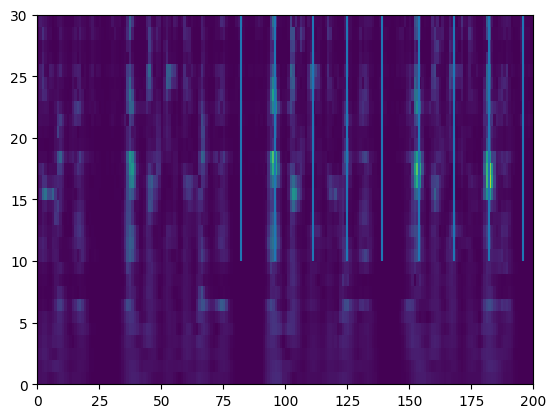

In [17]:
plt.pcolor(E_train.features['percussive'][0])
plt.vlines(E_train.features['beat'][0], 10, 30)
plt.xlim(0, 200)
plt.ylim(0, 30)

ChatGPT query

Write a python function with a following signature

```
rnd = np.random.default_rng(42)
def crop_by_beats(beat, harmony_specs, percussion_specs, frames_per_beat = 4, number_of_beats=16, number_of_samples=8)
    pass
```

beats is the integer array of frames at which there was a beat
upsample beats , for two neighboring values insert frames_per_beat-1 values between them uniformly cropped to the nearest frame

Next number_of_samples times sample starting position in the upsampled beats array and take number_of_beats * frames_per_beat consequent beats. Position must be sampled aligned to number_of_beats * frames_per_beat.

harmony_specs is a list of several spectrograms with harmonic parts of melody.
for each of harmony spec calculate the mean along time axis (axis = 1) between the consequent beats of the sample including the frames at which there was a beat

percussion_specs is a list of several spectrograms with percussion parts of melody. For each of percussion spec calculate the downsampled spectrogram as with harmony specs but shift the spectrogram so that the first sample was centered at the beat. The resulting length must be the same

return list of tuples containing downsampled spectrograms

In [18]:
rnd = np.random.default_rng(42)

def crop_by_beats(
    beat,
    harmony_specs,
    percussion_specs,
    frames_per_beat=4,
    number_of_beats=4,
    number_of_samples=8
):
    """
    Upsample the array of integer beat positions and then randomly extract 
    (number_of_samples) chunks of length (number_of_beats * frames_per_beat).
    
    For each chunk, compute the downsampled spectrogram:
      - For harmonic specs: take the mean along the time axis (axis=1) 
        between consecutive upsampled-beat boundaries.
      - For percussion specs: take the mean along the time axis over intervals 
        shifted so that each is centered at the corresponding upsampled beat.
    
    Parameters
    ----------
    beat : 1D array-like of int
        Array of frame indices at which a beat occurs. Must be strictly increasing.
    harmony_specs : list of np.ndarray
        Each element is a spectrogram for a harmonic component with shape 
        (freq_bins, time_frames).
    percussion_specs : list of np.ndarray
        Each element is a spectrogram for a percussion component with shape 
        (freq_bins, time_frames).
    frames_per_beat : int
        Number of subdivisions per original beat when upsampling.
    number_of_beats : int
        How many beats (in terms of upsampled subdivisions) to include in each chunk.
    number_of_samples : int
        How many random chunks to extract.
    
    Returns
    -------
    list of tuples
        A list (of length `number_of_samples`). Each element is:
        
            (harmony_downsampled_list, percussion_downsampled_list)
        
        where `harmony_downsampled_list` and `percussion_downsampled_list` are each 
        lists of spectrograms (in the same order as `harmony_specs` and 
        `percussion_specs`). Each downsampled spectrogram has shape:
        
            (freq_bins, number_of_beats * frames_per_beat)
    """
    
    # 1) Upsample 'beat' by inserting (frames_per_beat - 1) points 
    #    uniformly between each pair of consecutive beats.
    up_beats = []
    beat = np.array(beat, dtype=int)
    for i in range(len(beat) - 1):
        start = beat[i]
        end = beat[i + 1]
        diff = end - start
        
        # Insert frames_per_beat subdivisions between start and end, 
        # snapping to the nearest integer frame.
        for k in range(frames_per_beat):
            val = start + round(k * diff / frames_per_beat)
            # Avoid duplicates if rounding yields same as last appended
            if not up_beats or val != up_beats[-1]:
                up_beats.append(val)
    
    up_beats = np.array(up_beats, dtype=int)
    
    # 2) We need (number_of_beats * frames_per_beat + 1) upsampled-beat 
    #    positions for each chunk (the +1 is because we need the right boundary).
    needed_length = number_of_beats * frames_per_beat + 1
    total_upsampled = len(up_beats)
    
    # If we cannot extract even one chunk, return empty
    max_start = total_upsampled - needed_length
    if max_start < 0:
        return []
    
    # Possible start indices must be multiples of (number_of_beats * frames_per_beat)
    # so that each chunk is "aligned".
    stride = number_of_beats * frames_per_beat
    possible_starts = np.arange(0, max_start + 1, stride)
    
    # Randomly choose 'number_of_samples' start indices from these possibilities
    chosen_starts = rnd.choice(possible_starts, size=number_of_samples, replace=True)
    
    results = []
    for start_idx in chosen_starts:
        # Boundaries for this sample
        boundary_points = up_beats[start_idx : start_idx + needed_length]
        # === 3) Downsample each harmony spec ===
        harmony_downsampled = []
        for spec in harmony_specs:
            # spec has shape (freq_bins, time_frames)
            freq_bins = spec.shape[0]
            
            # We'll get (number_of_beats * frames_per_beat) intervals
            ds_harm = np.zeros((freq_bins, number_of_beats * frames_per_beat),
                               dtype=spec.dtype)
            for j in range(number_of_beats * frames_per_beat):
                left = boundary_points[j]
                right = boundary_points[j + 1]
                # Take the average along axis=1 (time axis)
                ds_harm[:, j] = spec[:, left:right].mean(axis=1)

            harmony_downsampled.append(ds_harm)
        
        # === 4) Downsample each percussion spec with centering ===
        percussion_downsampled = []
        for spec in percussion_specs:
            
            freq_bins = spec.shape[0]
            ds_perc = np.zeros((freq_bins, number_of_beats * frames_per_beat),
                               dtype=spec.dtype)

            old_right = None
            for j in range(number_of_beats * frames_per_beat):
                dist = boundary_points[j + 1] - boundary_points[j]
                right = boundary_points[j + 1] - dist // 2
                if old_right is None:
                    left = boundary_points[j] - dist // 2
                else:
                    left = old_right
                old_right = right
                
                # Clamp to valid range
                if left < 0:
                    left = 0
                if right > spec.shape[1]:
                    right = spec.shape[1]

                # Average over the time axis in [left, right)
                chunk = spec[:, left:right]
                ds_perc[:, j] = chunk.mean(axis=1)
            
            percussion_downsampled.append(ds_perc)
        
        # One result entry = (list_of_downsampled_harmony_specs, list_of_downsampled_percussion_specs)
        results.append((harmony_downsampled, percussion_downsampled))
    print("")
    return results

In [19]:
Extractor.register_extractor('sample', 
                             lambda beat, cqt, harmonic, mfcc, percussive: 
                             crop_by_beats(
                                 beat=beat, 
                                 harmony_specs=[cqt, harmonic, mfcc], 
                                 percussion_specs=[percussive]
                             ), shuffle=True, map_labels=[
                                 ('idx', 's_idx'), 
                                 ('y', 's_y'), 
                                 ('stats', 's_stats'), 
                                 ('bpm', 's_bpm'),
                                 ('rms', 's_rms')
                             ])
Extractor.register_extractor('s_cqt', lambda sample: sample[0][0])
Extractor.register_extractor('s_harmonic', lambda sample: sample[0][1])
Extractor.register_extractor('s_mfcc', lambda sample: sample[0][2])
Extractor.register_extractor('s_percussive', lambda sample: sample[1][0])


In [23]:
E_train.soft_extract()
E_eval.soft_extract()

In [24]:
Extractor.register_extractor('cqt_freq_stats', 
                             lambda s_cqt: np.hstack([s_cqt.mean(axis=1), s_cqt.var(axis=1)]))
Extractor.register_extractor('harmonic_freq_stats', 
                             lambda s_harmonic: np.hstack([s_harmonic.mean(axis=1), s_harmonic.var(axis=1)]))
Extractor.register_extractor('percussive_freq_stats', 
                             lambda s_percussive: np.hstack([s_percussive.mean(axis=1), s_percussive.var(axis=1)]))
Extractor.register_extractor('percussive_beat_frames', 
                             lambda s_percussive: s_percussive.mean(axis=0))

In [25]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_freq_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

harmonic_freq_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

percussive_freq_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

percussive_beat_frames:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_freq_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

harmonic_freq_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

percussive_freq_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

percussive_beat_frames:   0%|          | 0/2400 [00:00<?, ?it/s]

In [27]:
features = ['cqt_freq_stats', 'harmonic_freq_stats', 'percussive_freq_stats', 'percussive_beat_frames']
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0]
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2945279	test: 0.3000000	best: 0.3000000 (0)	total: 85.5ms	remaining: 42.7s
50:	learn: 0.6078326	test: 0.5262500	best: 0.5295833 (48)	total: 1.49s	remaining: 13.1s
100:	learn: 0.7015379	test: 0.5775000	best: 0.5779167 (97)	total: 2.89s	remaining: 11.4s
150:	learn: 0.7626967	test: 0.6070833	best: 0.6070833 (150)	total: 4.15s	remaining: 9.59s
200:	learn: 0.7988197	test: 0.6233333	best: 0.6254167 (195)	total: 5.43s	remaining: 8.08s
250:	learn: 0.8297568	test: 0.6408333	best: 0.6433333 (229)	total: 6.73s	remaining: 6.68s
300:	learn: 0.8506795	test: 0.6462500	best: 0.6500000 (280)	total: 7.98s	remaining: 5.28s
350:	learn: 0.8726753	test: 0.6604167	best: 0.6604167 (350)	total: 9.23s	remaining: 3.92s
400:	learn: 0.8851931	test: 0.6575000	best: 0.6608333 (352)	total: 10.5s	remaining: 2.59s
450:	learn: 0.8952074	test: 0.6658333	best: 0.6658333 (450)	total: 11.7s	remaining: 1.27s
499:	learn: 0.9064735	test: 0.6712500	best: 0.6725000 (489)	total: 13s	remaining: 0us

bestTest = 0.6725
b

In [28]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
harmonic_freq_stats_83,1.701588
harmonic_freq_stats_75,1.412591
percussive_freq_stats_106,1.395804
percussive_freq_stats_99,1.380682
percussive_freq_stats_13,1.331298
percussive_freq_stats_92,1.299336
percussive_freq_stats_89,1.273313
percussive_freq_stats_102,1.272257
percussive_beat_frames_8,1.172925
cqt_freq_stats_94,1.100774


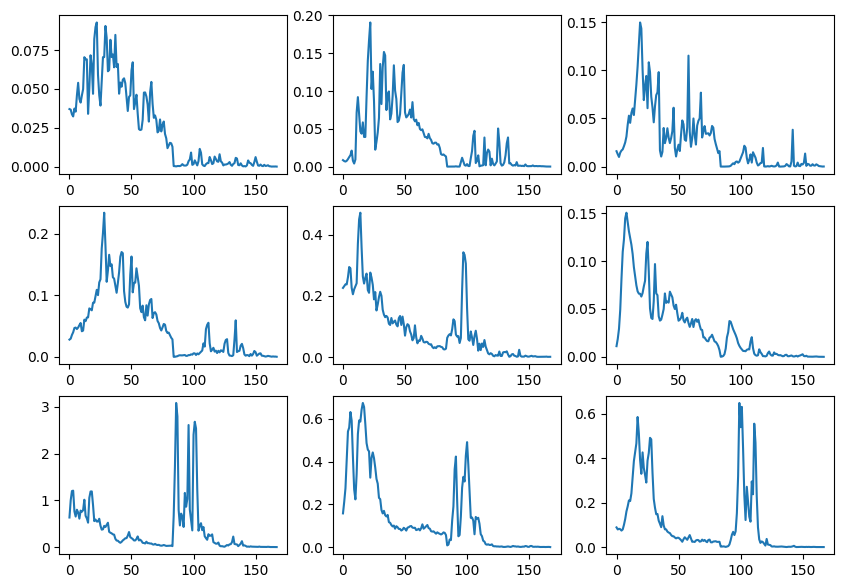

In [30]:
# It looks like the one of the most important features are high frequencies of drums, which is the last thing I expected. Lets check pictures:
s_y = E_train.get_features(['s_y'])[:, 0]
jazz_idx = np.where(s_y == 'jazz')[0][:3]
rock_idx = np.where(s_y == 'rock')[0][:3]
hip_hop_idx = np.where(s_y == 'hiphop')[0][:3]

plt.figure().set_size_inches(10, 7)
for pos, idx in enumerate(np.hstack([jazz_idx, rock_idx, hip_hop_idx])):
    plt.subplot(3, 3, pos + 1)
    plt.plot(E_train.features['percussive_freq_stats'][idx])

In [32]:
# Lets add BPM and RMS

features = ['s_rms', 's_bpm', 'cqt_freq_stats', 'harmonic_freq_stats', 'percussive_freq_stats', 'percussive_beat_frames']
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0]
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3252861	test: 0.3200000	best: 0.3200000 (0)	total: 71.9ms	remaining: 35.9s
50:	learn: 0.6344778	test: 0.5320833	best: 0.5337500 (49)	total: 1.45s	remaining: 12.7s
100:	learn: 0.7274678	test: 0.6008333	best: 0.6020833 (95)	total: 2.81s	remaining: 11.1s
150:	learn: 0.7818312	test: 0.6200000	best: 0.6216667 (142)	total: 4.13s	remaining: 9.54s
200:	learn: 0.8324392	test: 0.6316667	best: 0.6379167 (192)	total: 5.48s	remaining: 8.15s
250:	learn: 0.8505007	test: 0.6429167	best: 0.6429167 (250)	total: 6.76s	remaining: 6.71s
300:	learn: 0.8705293	test: 0.6529167	best: 0.6541667 (294)	total: 8.03s	remaining: 5.31s
350:	learn: 0.8868026	test: 0.6616667	best: 0.6637500 (338)	total: 9.33s	remaining: 3.96s
400:	learn: 0.9005722	test: 0.6662500	best: 0.6670833 (397)	total: 10.9s	remaining: 2.69s
450:	learn: 0.9127325	test: 0.6687500	best: 0.6691667 (446)	total: 12.1s	remaining: 1.32s
499:	learn: 0.9223891	test: 0.6750000	best: 0.6762500 (496)	total: 13.4s	remaining: 0us

bestTest = 0.6762

In [33]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
s_rms_0,4.464436
s_bpm_0,4.042891
percussive_freq_stats_106,1.871748
percussive_freq_stats_111,1.834868
harmonic_freq_stats_83,1.779945
percussive_freq_stats_99,1.747408
percussive_freq_stats_17,1.746550
cqt_freq_stats_92,1.599634
percussive_freq_stats_14,1.400042
harmonic_freq_stats_79,1.242292


Common to all splits features look more important to catboost (as they contain data about whole sample).
But we will calculate majority over samples, and using common features sploils the whole bagging idea.
Luckily it is possible to specify feature weights in catboost

In [41]:
# ChatGPT query:
#
# I have an array with feature names and I want to generate weights for the features. Some of the feature names look like <name>_<index>. 
# I want to make a function receiving a dict with prefixes and corresponding feature weights. 
# It should return the np.array of the same shape as feature_names, containing weights. 
# If the feature name starts with prefix from the dict then the weight has to be taken from the dict, otherwise it has to be 1. 
# Here is the signature:
# 
# def assign_feature_weights(feature_names: np.ndarray, weights: dict[str, int]) -> np.ndarray:
#     pass

import numpy as np

def assign_feature_weights(feature_names: np.ndarray, weights: dict[str, float]) -> np.ndarray:
    """
    Assign weights to features based on given prefixes.
    
    Parameters
    ----------
    feature_names : np.ndarray
        Array of feature names.
    weights : dict[str, float]
        Dictionary mapping a prefix (string) to a weight (float).
        
    Returns
    -------
    np.ndarray
        An array of the same shape as `feature_names` containing the assigned weights. 
        If a feature name starts with any prefix in `weights`, the corresponding weight 
        is used. Otherwise, the weight is 1.0.
    """
    result_weights = np.ones_like(feature_names, dtype=float)  # default is 1.0
    
    for i, fname in enumerate(feature_names):
        for prefix, w in weights.items():
            if fname.startswith(prefix):
                result_weights[i] = w
                break  # Stop at the first matching prefix

    return result_weights


In [65]:
features = ['s_rms', 's_bpm', 'cqt_freq_stats', 'harmonic_freq_stats', 'percussive_freq_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3252861	test: 0.3200000	best: 0.3200000 (0)	total: 62ms	remaining: 30.9s
50:	learn: 0.6246423	test: 0.5325000	best: 0.5325000 (50)	total: 1.48s	remaining: 13.1s
100:	learn: 0.7113734	test: 0.5958333	best: 0.5979167 (97)	total: 2.77s	remaining: 10.9s
150:	learn: 0.7725322	test: 0.6120833	best: 0.6204167 (144)	total: 4.03s	remaining: 9.31s
200:	learn: 0.8104435	test: 0.6341667	best: 0.6350000 (198)	total: 5.29s	remaining: 7.87s
250:	learn: 0.8390558	test: 0.6475000	best: 0.6491667 (248)	total: 6.6s	remaining: 6.55s
300:	learn: 0.8615880	test: 0.6591667	best: 0.6591667 (299)	total: 7.98s	remaining: 5.28s
350:	learn: 0.8737482	test: 0.6641667	best: 0.6650000 (342)	total: 9.26s	remaining: 3.93s
400:	learn: 0.8898426	test: 0.6716667	best: 0.6720833 (399)	total: 10.6s	remaining: 2.62s
450:	learn: 0.8987840	test: 0.6762500	best: 0.6762500 (450)	total: 11.9s	remaining: 1.29s
499:	learn: 0.9111230	test: 0.6783333	best: 0.6816667 (488)	total: 13.2s	remaining: 0us

bestTest = 0.6816666

In [62]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
percussive_freq_stats_99,2.147362
harmonic_freq_stats_83,1.879729
percussive_freq_stats_106,1.858941
s_bpm_0,1.838338
cqt_freq_stats_92,1.825316
percussive_freq_stats_14,1.816211
percussive_freq_stats_111,1.690769
percussive_freq_stats_17,1.586334
harmonic_freq_stats_27,1.387238
cqt_freq_stats_32,1.261905


In [79]:
# Lets add other stats

features = ['s_stats', 's_bpm', 'cqt_freq_stats', 'harmonic_freq_stats', 'percussive_freq_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_bpm=0.7, s_stats=0.65))

model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2861230	test: 0.2866667	best: 0.2866667 (0)	total: 84.2ms	remaining: 42s
50:	learn: 0.7408798	test: 0.6283333	best: 0.6283333 (50)	total: 1.82s	remaining: 16s
100:	learn: 0.8369099	test: 0.7062500	best: 0.7083333 (98)	total: 3.43s	remaining: 13.5s
150:	learn: 0.8962804	test: 0.7379167	best: 0.7391667 (142)	total: 4.89s	remaining: 11.3s
200:	learn: 0.9329399	test: 0.7491667	best: 0.7541667 (195)	total: 6.3s	remaining: 9.37s
250:	learn: 0.9459943	test: 0.7579167	best: 0.7616667 (247)	total: 7.7s	remaining: 7.63s
300:	learn: 0.9628040	test: 0.7620833	best: 0.7675000 (259)	total: 9.09s	remaining: 6.01s
350:	learn: 0.9738913	test: 0.7745833	best: 0.7762500 (331)	total: 10.5s	remaining: 4.45s
400:	learn: 0.9830114	test: 0.7783333	best: 0.7787500 (372)	total: 11.9s	remaining: 2.93s
450:	learn: 0.9874821	test: 0.7800000	best: 0.7825000 (444)	total: 13.3s	remaining: 1.44s
499:	learn: 0.9908798	test: 0.7816667	best: 0.7866667 (487)	total: 14.6s	remaining: 0us

bestTest = 0.7866666667

In [80]:
imp = pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)
imp['stat_name'] = pd.Series(imp.index, index=imp.index).apply(lambda x: int(x[8:]) if x.startswith('s_stats') else None)
imp['stat_name'] = imp['stat_name'].apply(lambda x: X_train.columns[int(x) + 2] if not np.isnan(x) else None)
imp

,importance,stat_name
s_stats_26,4.598714,mfcc5_var
s_stats_23,4.052141,mfcc4_mean
s_stats_0,3.151464,chroma_stft_mean
s_stats_5,3.083909,spectral_centroid_var
percussive_freq_stats_104,2.106430,None
s_stats_33,2.067107,mfcc9_mean
s_stats_12,1.928132,harmony_mean
cqt_freq_stats_93,1.797927,None
s_stats_9,1.781267,rolloff_var
percussive_freq_stats_101,1.780725,None


TODO: translate to English
1. Высокий вес у mfcc - это преобразование Фурье посчитанное поверх mel спектрограммы.
Эта операция выполняет 2 цели, понижает размерность, и позволяет оценить фундаментальную частоту
2. Высокий вес у статистик над хроматическими фичами (то есть какая нота встречается чаще)
3. Высокий вес у статистик спектрального центроида

Вывод: Надо добавить эти фичи, только посчитанные на кусочке

In [81]:
Extractor.register_extractor('mfcc_quef_stats', 
                             lambda s_mfcc: np.hstack([s_mfcc.mean(axis=1), s_mfcc.var(axis=1)]))

# Usually STFT is used for spectral centroid, but I will use CQT, it may turn out to be even more precise.
cqt_frequencies = librosa.cqt_frequencies(n_bins=n_bins, fmin=fmin, bins_per_octave=bins_per_octave)
Extractor.register_extractor('cqt_spectral_centroid', 
                             lambda s_cqt: np.sum(cqt_frequencies.reshape(-1, 1) * librosa.util.normalize(s_cqt, norm=1, axis=-2), axis=0))

Extractor.register_extractor('cqt_spectral_centroid_stats', 
                             lambda cqt_spectral_centroid: np.array([cqt_spectral_centroid.mean(), cqt_spectral_centroid.var()]))

chroma_map = librosa.filters.cq_to_chroma(cqt_frequencies.shape[0], bins_per_octave=bins_per_octave, n_chroma=bins_per_octave, fmin=fmin)
Extractor.register_extractor('cqt_chroma', 
                             lambda s_cqt: np.dot(chroma_map, s_cqt))
Extractor.register_extractor('cqt_chroma_stats', 
                             lambda cqt_chroma: np.hstack([cqt_chroma.mean(axis=1), cqt_chroma.var(axis=1)]))

Extractor.register_extractor('harmonic_chroma', 
                             lambda s_harmonic: np.dot(chroma_map, s_harmonic))
Extractor.register_extractor('harmonic_chroma_stats', 
                             lambda harmonic_chroma: np.hstack([harmonic_chroma.mean(axis=1), harmonic_chroma.var(axis=1)]))


In [82]:
E_train.soft_extract()
E_eval.soft_extract()

In [85]:
# Lets add MFCC, chromatic features and centroid

features = ['s_rms', 's_bpm', 'cqt_freq_stats', 'harmonic_freq_stats', 'percussive_freq_stats', 'percussive_beat_frames',
           'cqt_spectral_centroid', 'cqt_spectral_centroid_stats', 'cqt_chroma_stats', 'harmonic_chroma_stats', 'mfcc_quef_stats']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3023963	test: 0.3016667	best: 0.3016667 (0)	total: 84.8ms	remaining: 42.3s
50:	learn: 0.6291130	test: 0.5383333	best: 0.5383333 (50)	total: 1.75s	remaining: 15.4s
100:	learn: 0.7256795	test: 0.6070833	best: 0.6087500 (97)	total: 3.31s	remaining: 13.1s
150:	learn: 0.7895207	test: 0.6370833	best: 0.6370833 (150)	total: 4.83s	remaining: 11.2s
200:	learn: 0.8192060	test: 0.6591667	best: 0.6595833 (187)	total: 6.36s	remaining: 9.46s
250:	learn: 0.8512160	test: 0.6712500	best: 0.6720833 (249)	total: 7.94s	remaining: 7.88s
300:	learn: 0.8705293	test: 0.6825000	best: 0.6854167 (299)	total: 9.44s	remaining: 6.24s
350:	learn: 0.8876967	test: 0.6870833	best: 0.6875000 (336)	total: 11s	remaining: 4.68s
400:	learn: 0.8986052	test: 0.6850000	best: 0.6883333 (391)	total: 12.5s	remaining: 3.09s
450:	learn: 0.9130901	test: 0.6895833	best: 0.6941667 (431)	total: 14s	remaining: 1.52s
499:	learn: 0.9236409	test: 0.6879167	best: 0.6941667 (431)	total: 15.4s	remaining: 0us

bestTest = 0.69416666

In [88]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
percussive_freq_stats_112,1.857907
percussive_freq_stats_20,1.744533
mfcc_quef_stats_17,1.599135
harmonic_freq_stats_83,1.501137
s_bpm_0,1.474766
mfcc_quef_stats_3,1.431291
percussive_freq_stats_92,1.422827
cqt_freq_stats_92,1.363115
cqt_freq_stats_8,1.254460
percussive_freq_stats_14,1.203224


In [112]:
# Lets leave out only features that turn out important. Boosting is not robust to autocorrelation. 
# There is of course penalty in CatBoost, but still it may make sense.
imp = pd.DataFrame(data=np.stack([E_train.get_feature_names_vector(features)]).T, columns=['feature_name'])
imp['importance'] = model.feature_importances_
imp['cropped_feature_name'] = imp['feature_name'].apply(lambda x: '_'.join(x.split('_')[:-1]))
imp[['cropped_feature_name', 'importance']].groupby('cropped_feature_name').agg(['max', 'mean']).sort_values(('importance', 'max'), ascending=False)

importance          
                                   max      mean
cropped_feature_name                            
percussive_freq_stats         1.857907  0.176254
mfcc_quef_stats               1.599135  0.392366
harmonic_freq_stats           1.501137  0.176176
s_bpm                         1.474766  1.474766
cqt_freq_stats                1.363115  0.108267
cqt_spectral_centroid         1.133964  0.184035
cqt_spectral_centroid_stats   0.786633  0.462719
percussive_beat_frames        0.723722  0.259397
harmonic_chroma_stats         0.286604  0.060462
cqt_chroma_stats              0.264755  0.060632
s_rms                         0.000000  0.000000

In [120]:
features = ['s_bpm', 'cqt_freq_stats', 'harmonic_freq_stats', 'percussive_freq_stats',
           'cqt_spectral_centroid', 'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3109800	test: 0.3162500	best: 0.3162500 (0)	total: 74.6ms	remaining: 37.2s
50:	learn: 0.6135551	test: 0.5437500	best: 0.5437500 (50)	total: 1.57s	remaining: 13.8s
100:	learn: 0.7113734	test: 0.5937500	best: 0.5966667 (92)	total: 3s	remaining: 11.8s
150:	learn: 0.7721745	test: 0.6295833	best: 0.6295833 (150)	total: 4.65s	remaining: 10.8s
200:	learn: 0.8172389	test: 0.6520833	best: 0.6558333 (196)	total: 6.12s	remaining: 9.1s
250:	learn: 0.8519313	test: 0.6650000	best: 0.6650000 (250)	total: 7.51s	remaining: 7.45s
300:	learn: 0.8683834	test: 0.6750000	best: 0.6758333 (285)	total: 8.9s	remaining: 5.88s
350:	learn: 0.8900215	test: 0.6812500	best: 0.6816667 (349)	total: 10.3s	remaining: 4.38s
400:	learn: 0.9020029	test: 0.6795833	best: 0.6816667 (349)	total: 11.8s	remaining: 2.92s
450:	learn: 0.9170243	test: 0.6862500	best: 0.6875000 (448)	total: 13.5s	remaining: 1.46s
499:	learn: 0.9254292	test: 0.6950000	best: 0.6958333 (498)	total: 15.2s	remaining: 0us

bestTest = 0.695833333

Lets try normalizing spectrograms. That way we will consider loundness and distribution seporately

In [146]:
Extractor.register_extractor('s_cqt_n', lambda s_cqt: librosa.util.normalize(s_cqt, norm=1))
Extractor.register_extractor('s_cqt_stats', lambda s_cqt: np.array([np.mean(s_cqt), np.var(s_cqt)]))
Extractor.register_extractor('s_harmonic_n', lambda s_harmonic: librosa.util.normalize(s_harmonic, norm=1))
Extractor.register_extractor('s_harmonic_stats', lambda s_harmonic: np.array([np.mean(s_harmonic), np.var(s_harmonic)]))
Extractor.register_extractor('s_percussive_n', lambda s_percussive: librosa.util.normalize(s_percussive, norm=1))
Extractor.register_extractor('s_percussive_stats', lambda s_percussive: np.array([np.mean(s_percussive), np.var(s_percussive)]))

Extractor.register_extractor('cqt_n_freq_stats', 
                             lambda s_cqt_n: np.hstack([s_cqt_n.mean(axis=1), s_cqt_n.var(axis=1)]))
Extractor.register_extractor('harmonic_n_freq_stats', 
                             lambda s_harmonic_n: np.hstack([s_harmonic_n.mean(axis=1), s_harmonic_n.var(axis=1)]))
Extractor.register_extractor('percussive_n_freq_stats', 
                             lambda s_percussive_n: np.hstack([s_percussive_n.mean(axis=1), s_percussive_n.var(axis=1)]))
Extractor.register_extractor('percussive_n_beat_frames', 
                             lambda s_percussive_n: s_percussive_n.mean(axis=0))

In [ ]:
E_train.soft_extract()
E_eval.soft_extract()

In [148]:
features = ['s_bpm', 'cqt_n_freq_stats', 's_cqt_stats', 'harmonic_n_freq_stats', 's_harmonic_stats', 'percussive_n_freq_stats', 's_percussive_stats',
           'cqt_spectral_centroid', 'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_n_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_cqt_stats=0.7, s_harmonic_stats=0.6, s_percussive_stats=0.6, s_rms=0.4, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2637697	test: 0.2458333	best: 0.2458333 (0)	total: 77.8ms	remaining: 38.8s
50:	learn: 0.6402003	test: 0.5500000	best: 0.5500000 (50)	total: 1.6s	remaining: 14.1s
100:	learn: 0.7292561	test: 0.5958333	best: 0.5958333 (100)	total: 3.11s	remaining: 12.3s
150:	learn: 0.7739628	test: 0.6150000	best: 0.6158333 (144)	total: 4.53s	remaining: 10.5s
200:	learn: 0.8184907	test: 0.6462500	best: 0.6462500 (200)	total: 5.95s	remaining: 8.85s
250:	learn: 0.8503219	test: 0.6475000	best: 0.6495833 (245)	total: 7.37s	remaining: 7.31s
300:	learn: 0.8732117	test: 0.6545833	best: 0.6550000 (299)	total: 8.77s	remaining: 5.8s
350:	learn: 0.8893062	test: 0.6537500	best: 0.6591667 (318)	total: 10.2s	remaining: 4.32s
400:	learn: 0.9041488	test: 0.6741667	best: 0.6754167 (399)	total: 11.6s	remaining: 2.86s
450:	learn: 0.9157725	test: 0.6754167	best: 0.6754167 (399)	total: 13.1s	remaining: 1.42s
499:	learn: 0.9291845	test: 0.6837500	best: 0.6837500 (499)	total: 14.6s	remaining: 0us

bestTest = 0.68375

In [150]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
mfcc_quef_stats_0,3.210912
s_percussive_stats_1,3.179025
s_bpm_0,2.413652
s_percussive_stats_0,2.040405
mfcc_quef_stats_3,1.753014
mfcc_quef_stats_16,1.695723
mfcc_quef_stats_17,1.685692
s_cqt_stats_1,1.578931
percussive_n_freq_stats_104,1.445851
mfcc_quef_stats_18,1.437079


In [154]:
features = ['s_stats', 's_bpm', 'cqt_freq_stats', 'harmonic_freq_stats', 'percussive_freq_stats',
           'cqt_spectral_centroid', 'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_stats=0.6, s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3331545	test: 0.3545833	best: 0.3545833 (0)	total: 74.4ms	remaining: 37.1s
50:	learn: 0.7213877	test: 0.6525000	best: 0.6525000 (50)	total: 1.68s	remaining: 14.8s
100:	learn: 0.8338698	test: 0.7041667	best: 0.7062500 (98)	total: 3.32s	remaining: 13.1s
150:	learn: 0.8885908	test: 0.7345833	best: 0.7345833 (150)	total: 4.9s	remaining: 11.3s
200:	learn: 0.9232833	test: 0.7512500	best: 0.7529167 (184)	total: 6.43s	remaining: 9.56s
250:	learn: 0.9431330	test: 0.7600000	best: 0.7645833 (245)	total: 7.95s	remaining: 7.88s
300:	learn: 0.9572604	test: 0.7733333	best: 0.7741667 (295)	total: 9.45s	remaining: 6.24s
350:	learn: 0.9653076	test: 0.7783333	best: 0.7804167 (333)	total: 11s	remaining: 4.65s
400:	learn: 0.9726395	test: 0.7833333	best: 0.7854167 (393)	total: 12.5s	remaining: 3.07s
450:	learn: 0.9778255	test: 0.7854167	best: 0.7904167 (433)	total: 13.9s	remaining: 1.51s
499:	learn: 0.9828326	test: 0.7841667	best: 0.7904167 (433)	total: 15.4s	remaining: 0us

bestTest = 0.7904166

In [155]:
imp = pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)
imp['stat_name'] = pd.Series(imp.index, index=imp.index).apply(lambda x: int(x[8:]) if x.startswith('s_stats') else None)
imp['stat_name'] = imp['stat_name'].apply(lambda x: X_train.columns[int(x) + 2] if not np.isnan(x) else None)
imp

,importance,stat_name
s_stats_26,4.427401,mfcc5_var
s_stats_0,3.359007,chroma_stft_mean
s_stats_23,3.317367,mfcc4_mean
s_stats_1,2.099267,chroma_stft_var
s_stats_12,1.960178,harmony_mean
s_stats_5,1.873972,spectral_centroid_var
s_stats_27,1.557917,mfcc6_mean
s_stats_24,1.502298,mfcc4_var
s_stats_6,1.469098,spectral_bandwidth_mean
s_stats_49,1.436415,mfcc17_mean


In [176]:
Extractor.register_extractor('cqt_chroma_1d_stats', lambda cqt_chroma: np.array([np.mean(cqt_chroma), np.var(cqt_chroma)]))
Extractor.register_extractor('harmonic_chroma_1d_stats', lambda harmonic_chroma: np.array([np.mean(harmonic_chroma), np.var(harmonic_chroma)]))

In [188]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_chroma_1d_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

harmonic_chroma_1d_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_chroma_1d_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

harmonic_chroma_1d_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

In [189]:
features = ['s_bpm', 'cqt_freq_stats', 'harmonic_freq_stats', 'percussive_freq_stats',
           'cqt_spectral_centroid', 'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_beat_frames', 'cqt_chroma_1d_stats', 'harmonic_chroma_1d_stats']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2986409	test: 0.3066667	best: 0.3066667 (0)	total: 91.3ms	remaining: 45.6s
50:	learn: 0.6199928	test: 0.5425000	best: 0.5425000 (50)	total: 1.61s	remaining: 14.2s
100:	learn: 0.7190629	test: 0.6108333	best: 0.6133333 (99)	total: 3.08s	remaining: 12.1s
150:	learn: 0.7823677	test: 0.6387500	best: 0.6416667 (143)	total: 4.5s	remaining: 10.4s
200:	learn: 0.8186695	test: 0.6491667	best: 0.6566667 (192)	total: 5.94s	remaining: 8.84s
250:	learn: 0.8442418	test: 0.6629167	best: 0.6629167 (250)	total: 7.34s	remaining: 7.28s
300:	learn: 0.8683834	test: 0.6791667	best: 0.6829167 (294)	total: 8.75s	remaining: 5.78s
350:	learn: 0.8851931	test: 0.6854167	best: 0.6875000 (335)	total: 10.2s	remaining: 4.31s
400:	learn: 0.9000358	test: 0.6950000	best: 0.6958333 (398)	total: 11.6s	remaining: 2.87s
450:	learn: 0.9145207	test: 0.6958333	best: 0.6987500 (418)	total: 13s	remaining: 1.42s
499:	learn: 0.9238197	test: 0.7025000	best: 0.7041667 (494)	total: 14.4s	remaining: 0us

bestTest = 0.7041666

In [190]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
s_bpm_0,1.719791
percussive_freq_stats_19,1.510180
percussive_freq_stats_18,1.498337
mfcc_quef_stats_16,1.468099
percussive_freq_stats_96,1.403783
percussive_freq_stats_99,1.317922
mfcc_quef_stats_17,1.300434
percussive_freq_stats_13,1.288580
percussive_freq_stats_89,1.144034
percussive_freq_stats_111,1.119203


In [196]:
roll_percent = 0.85
Extractor.register_extractor('cqt_rollof', 
                             lambda s_cqt: librosa.feature.spectral.spectral_rolloff(S=s_cqt, freq=cqt_frequencies, roll_percent=roll_percent))

Extractor.register_extractor('cqt_rollof_stats', 
                             lambda cqt_rollof: np.array([cqt_rollof.mean(), cqt_rollof.var()]))

Extractor.register_extractor('cqt_bandwidth', 
                             lambda s_cqt: librosa.feature.spectral.spectral_bandwidth(S=s_cqt, freq=cqt_frequencies))

Extractor.register_extractor('cqt_bandwidth_stats', 
                             lambda cqt_bandwidth: np.array([cqt_bandwidth.mean(), cqt_bandwidth.var()]))



In [197]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_bandwidth:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_bandwidth_stats:   0%|          | 0/5592 [00:00<?, ?it/s]

cqt_rollof:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_rollof_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_bandwidth:   0%|          | 0/2400 [00:00<?, ?it/s]

cqt_bandwidth_stats:   0%|          | 0/2400 [00:00<?, ?it/s]

TODO: Write some reasoning for SVD

In [205]:
features = ['s_bpm', 'cqt_freq_stats', 'harmonic_freq_stats', 'percussive_freq_stats',
           'cqt_spectral_centroid', 'cqt_spectral_centroid_stats', 'mfcc_quef_stats', 'percussive_beat_frames']
weights = assign_feature_weights(E_train.get_feature_names_vector(features), dict(s_rms=0.5, s_bpm=0.7, mfcc_quef=0.8))
model, acc = train_and_evaluate_catboost(
    idx_eval=E_eval.get_features(['s_idx'])[:,0],
    X_train=E_train.get_features(features),
    X_eval=E_eval.get_features(features),
    y_train=E_train.get_features(['s_y'])[:,0], 
    y_eval=E_eval.get_features(['s_y'])[:,0],
    feature_weights=weights
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2827253	test: 0.2683333	best: 0.2683333 (0)	total: 92.1ms	remaining: 46s
50:	learn: 0.6432403	test: 0.5425000	best: 0.5425000 (50)	total: 1.74s	remaining: 15.4s
100:	learn: 0.7337268	test: 0.6179167	best: 0.6179167 (100)	total: 3.14s	remaining: 12.4s
150:	learn: 0.7848712	test: 0.6350000	best: 0.6404167 (145)	total: 4.62s	remaining: 10.7s
200:	learn: 0.8202790	test: 0.6537500	best: 0.6604167 (197)	total: 6.07s	remaining: 9.03s
250:	learn: 0.8526466	test: 0.6716667	best: 0.6729167 (248)	total: 7.5s	remaining: 7.44s
300:	learn: 0.8687411	test: 0.6770833	best: 0.6808333 (296)	total: 8.88s	remaining: 5.87s
350:	learn: 0.8887697	test: 0.6758333	best: 0.6858333 (317)	total: 10.3s	remaining: 4.38s
400:	learn: 0.9005722	test: 0.6800000	best: 0.6858333 (317)	total: 11.7s	remaining: 2.89s
450:	learn: 0.9132690	test: 0.6820833	best: 0.6858333 (317)	total: 13.1s	remaining: 1.42s
499:	learn: 0.9239986	test: 0.6870833	best: 0.6870833 (499)	total: 14.5s	remaining: 0us

bestTest = 0.687083

In [200]:
pd.DataFrame(
    data=model.feature_importances_, 
    index=E_train.get_feature_names_vector(features), 
    columns=['importance']
).sort_values(by='importance', ascending=False).head(15)

,importance
percussive_freq_stats_18,1.891821
s_bpm_0,1.707344
cqt_bandwidth_stats_1,1.530804
percussive_freq_stats_100,1.484997
cqt_freq_stats_7,1.399317
mfcc_quef_stats_3,1.281096
percussive_freq_stats_22,1.252562
percussive_freq_stats_109,1.157049
cqt_freq_stats_93,1.135267
percussive_freq_stats_101,1.116467
